In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from itertools import islice
import itertools as it

# Import the python file (.py) which contains all defined functions
import stratalArchitecture as strata

# Display plots in SVG format
%config InlineBackend.figure_format = 'svg'

# Display plots in cells
%matplotlib inline

#
import morphoGrid as morph
import morphoGrid_noflex as morphnf# from scripts import morphoGrid_sl as morph_sl


In [58]:
# Loading the files with the metrics e.g. flexure, accumulation
#Synthetic

Delta_SL0_Te50=pd.read_csv ('extracted_results/Synthetic/Delta_SL0_Te50.csv',sep=',', header=0)
Delta_SL_f5Myr_A25m_Te50=pd.read_csv('extracted_results/Synthetic/Delta_SL_f5Myr_A25m_Te50.csv', sep=',',header=0)
Delta_SL_f500Kyr_A25m_Te50=pd.read_csv ('extracted_results/Synthetic/Delta_SL_f500Kyr_A25m_Te50.csv',sep=',', header=0)
Delta_SL0_NoFlex=pd.read_csv ('extracted_results/Synthetic/Delta_SL0_Noflex.csv',sep=',', header=0)
Delta_SL_f5Myr_A25m_NoFlex=pd.read_csv('extracted_results/Synthetic/Delta_SL_f5Myr_A25m_NoFlex.csv', sep=',',header=0)
Delta_SL_f500Kyr_A25m_NoFlex=pd.read_csv ('extracted_results/Synthetic/Delta_SL_f500Kyr_A25m_NoFlex.csv',sep=',', header=0)

#IH GH
Delta_SL_IH_Te50=pd.read_csv ('extracted_results/IH_GH/Miller/Delta_SL_IH_Te50.csv',sep=',', header=0)
Delta_SL_IH_NoFlex=pd.read_csv ('extracted_results/IH_GH/Miller/Delta_SL_IH_NoFlex.csv',sep=',', header=0)
Delta_SL_GH_Te50=pd.read_csv ('extracted_results/IH_GH/Miller/Delta_SL_GH_Te50_120820manual.csv',sep=',', header=0)
Delta_SL_GH_NoFlex=pd.read_csv ('extracted_results/IH_GH/Miller/Delta_SL_GH_NoFlex_120820manual.csv',sep=',', header=0)


#Loading the sea level curves
Delta_SL_f5Myr_A25m=pd.read_csv('../../2_model_running/data/f5Myr_A25m.csv', sep=' ',header=None)
Delta_SL_f500Kyr_A25m=pd.read_csv('../../2_model_running/data/f500Kyr_A25m.csv', sep=' ',header=None)
SL_IH=pd.read_csv('../../2_model_running/data/SL_IH.csv', sep=' ',header=None)
SL_GH=pd.read_csv('../../2_model_running/data/SL_GH.csv', sep=' ',header=None)

sea_level=(Delta_SL_f5Myr_A25m, Delta_SL_f500Kyr_A25m, SL_IH, SL_GH)

results_Te50=(Delta_SL0_Te50, Delta_SL_f500Kyr_A25m_Te50, Delta_SL_f5Myr_A25m_Te50, Delta_SL_IH_Te50, Delta_SL_GH_Te50)

results_NF=(Delta_SL0_NoFlex, Delta_SL_f500Kyr_A25m_NoFlex, Delta_SL_f5Myr_A25m_NoFlex, Delta_SL_IH_NoFlex, Delta_SL_GH_NoFlex)


In [74]:
sim=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL_f500Kyr_A25m_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL_f5Myr_A25m_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_Te50/h5']
sim_nf=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_NoFlex/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL_f500Kyr_A25m_NoFlex/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL_f5Myr_A25m_NoFlex/h5',
         '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_NoFlex/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_NoFlex/h5']


In [4]:
#Formating 
grey=(0.1,0.1,0.1,0.5)
Pal_color=(0,.8,0,0.8)
Oli_color=(0,0,1,0.5)
thresholds=[2, 2.8, 3.6,  5.7, 6.7, 8.1, 10.5,10.7, 11.8]


In [236]:
data_WF=[]
data_NF=[]
for i in np.arange(0,len(sim),1):
    data_WF.append(results_Te50[i].X[i_ts:l_ts]/1e6)
    data_NF.append(results_NF[i].X[i_ts:l_ts]/1e6)

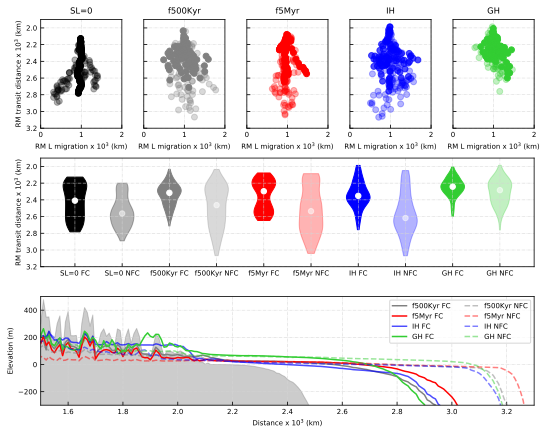

In [256]:
ncols=5
nrows=3
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)
i_ts=20
l_ts=-1
ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119
GH_color='limegreen'# GH_color=(0,1,0,0.7)
IH_color=(0,0,1,0.7)
color_marker=['k',  'grey', 'red',  IH_color, GH_color]
labels=['SL=0','f500Kyr', 'f5Myr', 'IH', 'GH']


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(19/2.54, 15/2.54))

############################
#1 row river mouth position#
############################

for i in np.arange(0,ncols,1):
    axes.flatten()[i].plot(results_Te50[i].Y[i_ts:l_ts]/1e6, results_Te50[i].X[i_ts:l_ts]/1e6,'o', color=color_marker[i])
    axes.flatten()[i].plot(results_NF[i].Y[i_ts:l_ts]/1e6, results_NF[i].X[i_ts:l_ts]/1e6,'o', color=color_marker[i], alpha=0.3)

############################
#2 row boxplots river mouth position#
############################

# for i in np.arange(0,ncols,1):
#     axes.flatten()[i].plot(results_Te50[i].Y[lb:ub]/1e3, results_Te50[i].X[lb:ub]/1e3,'o', color=color_marker[i])
#     axes.flatten()[i].plot(results_NF[i].Y[lb:ub]/1e3, results_NF[i].X[lb:ub]/1e3,'o', color=color_marker[i], alpha=0.3)

ax2=plt.subplot2grid((nrows,ncols),(1,0), colspan=ncols)

#Min    
parts2=ax2.violinplot(dataset=data_WF,positions=np.arange(0, len(data_WF)*2, 2), showmeans=False, showmedians=False,
        showextrema=False)
for b,c in zip(parts2['bodies'],it.islice(it.cycle(color_marker), 0, len(parts2['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(1)
quartile1, medians, quartile3 = np.percentile(data_WF, [25, 50, 75], axis=1)
ax2.scatter(np.arange(0, len(data_WF)*2, 2), medians, marker='o', color='white', s=30, zorder=3)
    
parts3=ax2.violinplot(dataset=data_NF,positions=np.arange(1, len(data_WF)*2, 2), showmeans=False, showmedians=False,
        showextrema=False)
for b,c in zip(parts3['bodies'],it.islice(it.cycle(color_marker), 0, len(parts3['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(.3)
    
quartile1, medians, quartile3 = np.percentile(data_NF, [25, 50, 75], axis=1)
ax2.scatter(np.arange(1, len(data_WF)*2, 2), medians, marker='o', color='white', s=30, zorder=3, alpha=0.5)

    
#################
#3 long profiles#
#################  
labels_FC=['SL=0 FC','f500Kyr FC', 'f5Myr FC', 'IH FC', 'GH FC' ]
labels_NFC=['SL=0 NFC', 'f500Kyr NFC', 'f5Myr NFC',  'IH NFC', 'GH NFC']
ax3=plt.subplot2grid((nrows,ncols),(2,0), colspan=ncols)

#Initial profile
morpho = morph.morphoGrid(sim[0],dx=1e4)
morpho.loadHDF5(timestep=initial_step)
ax3.fill(np.append(min(morpho.x[xs_i,ub:db]/1e6), morpho.x[xs_i,ub:db]/1e6),
         np.append(min(morpho.z[xs_i,ub:db]), morpho.z[xs_i,ub:db]),alpha=0.4,  color='grey') 

#Profile final timestep flexurally compensated cases
for i in np.arange(1,len(sim),1):        
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        ax3.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i], label=labels_FC[i])

#Profile final timestep non-flexurally compensated cases
for i in np.arange(1,len(sim),1): 
        morpho = morphnf.morphoGrid_noflex(sim_nf[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        ax3.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i], linestyle='--', label=labels_NFC[i], alpha=0.5)

    
############
#Formatting#
############
    
for i in np.arange(0,ncols,1):
    axes.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.flatten()[i].tick_params(direction= 'in')
    axes.flatten()[i].set_xlim([0, 2])
    axes.flatten()[i].set_ylim([3.2, 1.9])
    axes.flatten()[i].set_xlabel('RM L migration x $10^3$ (km)')
    axes.flatten()[i].set_title(labels[i])
    if i==0:
        axes.flatten()[i].set_ylabel('RM transit distance x $10^3$ (km)')
    if i>0:
        axes.flatten()[i].set_yticklabels([])  

ax2.set_ylim([3.2, 1.9])        
ax2.set_xticks(ticks=np.arange(0, len(data_WF)*2, 1))
ax2.set_xticklabels(labels=list(itertools.chain(*list(zip(labels_FC, labels_NFC)))))
ax2.tick_params(direction= 'in')
ax2.grid(color='lightgrey', linestyle='-.', linewidth=0.5, zorder=10)
ax2.set_ylabel('RM transit distance x $10^3$ (km)')

ax3.set_ylim(-300,500)
ax3.set_xlim(1.5, 3.3)
ax3.set_ylabel('Elevation (m)')  
ax3.set_xlabel('Distance x $10^3$ (km)')
ax3.grid(color='lightgrey', linestyle='-.', linewidth=0.5, zorder=0)
ax3.tick_params(direction= 'in')

ax3.legend(ncol=2)

plt.subplots_adjust(hspace = 0.1)
plt.tight_layout(0)
fig.savefig('./images/egusphere-2023-53_Fig7.pdf', res=300)


# Version with diffent rowspans

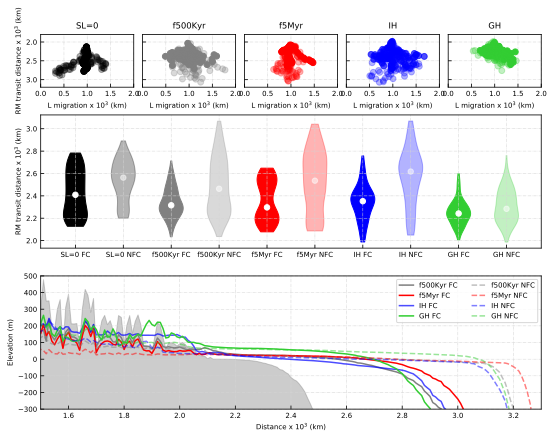

In [237]:
ncols=5
nrows=5
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)
i_ts=20
l_ts=-1
ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119
GH_color='limegreen'# GH_color=(0,1,0,0.7)
IH_color=(0,0,1,0.7)
color_marker=['k',  'grey', 'red',  IH_color, GH_color]
labels=['SL=0','f500Kyr', 'f5Myr', 'IH', 'GH']


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(19/2.54, 15/2.54))

############################
#1 row river mouth position#
############################

for i in np.arange(0,ncols,1):
    axes.flatten()[i].plot(results_Te50[i].Y[i_ts:l_ts]/1e6, results_Te50[i].X[i_ts:l_ts]/1e6,'o', color=color_marker[i])
    axes.flatten()[i].plot(results_NF[i].Y[i_ts:l_ts]/1e6, results_NF[i].X[i_ts:l_ts]/1e6,'o', color=color_marker[i], alpha=0.3)

############################
#2 row boxplots river mouth position#
############################

ax2=plt.subplot2grid((nrows,ncols),(1,0), colspan=ncols, rowspan=2)

#Min    
parts2=ax2.violinplot(dataset=data_WF,positions=np.arange(0, len(data_WF)*2, 2), showmeans=False, showmedians=False,
        showextrema=False)
for b,c in zip(parts2['bodies'],it.islice(it.cycle(color_marker), 0, len(parts2['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(1)
quartile1, medians, quartile3 = np.percentile(data_WF, [25, 50, 75], axis=1)
ax2.scatter(np.arange(0, len(data_WF)*2, 2), medians, marker='o', color='white', s=30, zorder=3)
    
parts3=ax2.violinplot(dataset=data_NF,positions=np.arange(1, len(data_WF)*2, 2), showmeans=False, showmedians=False,
        showextrema=False)
for b,c in zip(parts3['bodies'],it.islice(it.cycle(color_marker), 0, len(parts3['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(.3)
    
quartile1, medians, quartile3 = np.percentile(data_NF, [25, 50, 75], axis=1)
ax2.scatter(np.arange(1, len(data_WF)*2, 2), medians, marker='o', color='white', s=30, zorder=3, alpha=0.5)

    
#################
#3 long profiles#
#################  
labels_FC=['SL=0 FC','f500Kyr FC', 'f5Myr FC', 'IH FC', 'GH FC' ]
labels_NFC=['SL=0 NFC', 'f500Kyr NFC', 'f5Myr NFC',  'IH NFC', 'GH NFC']
ax3=plt.subplot2grid((nrows,ncols),(3,0), colspan=ncols, rowspan=2)

#Initial profile
morpho = morph.morphoGrid(sim[0],dx=1e4)
morpho.loadHDF5(timestep=initial_step)
ax3.fill(np.append(min(morpho.x[xs_i,ub:db]/1e6), morpho.x[xs_i,ub:db]/1e6),
         np.append(min(morpho.z[xs_i,ub:db]), morpho.z[xs_i,ub:db]),alpha=0.4,  color='grey') 

#Profile final timestep flexurally compensated cases
for i in np.arange(1,len(sim),1):        
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        ax3.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i], label=labels_FC[i])

#Profile final timestep non-flexurally compensated cases
for i in np.arange(1,len(sim),1): 
        morpho = morphnf.morphoGrid_noflex(sim_nf[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        ax3.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i], linestyle='--', label=labels_NFC[i], alpha=0.5)

    
############
#Formatting#
############
    
for i in np.arange(0,ncols,1):
    axes.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.flatten()[i].tick_params(direction= 'in')
    axes.flatten()[i].set_xlim([0, 2])
    axes.flatten()[i].set_ylim([ 3.2,1.8])
    axes.flatten()[i].set_xlabel('L migration x $10^3$ (km)')
    axes.flatten()[i].set_title(labels[i])
    if i==0:
        axes.flatten()[i].set_ylabel('RM transit distance x $10^3$ (km)')
    if i>0:
        axes.flatten()[i].set_yticklabels([])  

ax2.grid(color='lightgrey', linestyle='-.', linewidth=0.5, zorder=0)
ax2.set_xticks(ticks=np.arange(0, len(data_WF)*2, 1))
ax2.set_xticklabels(labels=list(itertools.chain(*list(zip(labels_FC, labels_NFC)))))
ax2.tick_params(direction= 'in')

ax2.set_ylabel('RM transit distance x $10^3$ (km)')
ax3.set_ylim(-300,500)
ax3.set_xlim(1.5, 3.3)
ax3.set_ylabel('Elevation (m)')  
ax3.set_xlabel('Distance x $10^3$ (km)')
ax3.grid(color='lightgrey', linestyle='-.', linewidth=0.5, zorder=0)
ax3.tick_params(direction= 'in')

ax3.legend(ncol=2)

plt.subplots_adjust( hspace = 0.1)

plt.tight_layout(0)
# fig.savefig('./River_mouth_1.pdf', res=300)
